In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

import npts

## Load Data (Grid Load in Northern California)

Data from 
http://www.caiso.com/planning/Pages/ReliabilityRequirements/Default.aspx#Historical ,
the webpage seems down, however.

In [2]:
caiso_df = pd.read_excel("data/HistoricalEMSHourlyLoad_2014-2016.xlsx")
caiso_df.index = caiso_df.Dates

PGE_loads = caiso_df.PGE
#SCE_loads = caiso_df.SCE
PGE_loads.index.name = ''

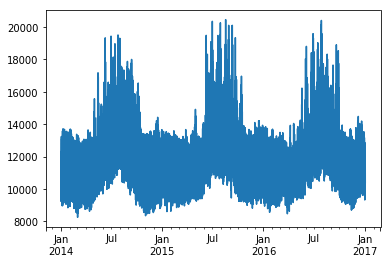

In [3]:
PGE_loads.plot()

In [4]:
print('we have years:', set(PGE_loads.index.year))
data_used = PGE_loads[PGE_loads.index.year < 2016]
indep_test = PGE_loads[PGE_loads.index.year >= 2016]

we have years: {2016, 2017, 2014, 2015}


## Fit and test the models 

In [5]:
indep_test_rmse = pd.DataFrame()
time_taken = pd.DataFrame()
model_objs = pd.DataFrame()

In [15]:
models_modelnames = []#(npts.Baseline(), 'constant avg.', 1.)]

features = [npts.HourOfDay, npts.MonthOfYear, npts.DayOfWeek, npts.USHoliday]

for n_features in [4]:

#     for features_used in itertools.combinations(features,n_features):
#         models_modelnames.append((npts.Baseline(*(f(lambdas=[1E-6]) for f in features_used)), 
#                                   ' and '.join(f.__name__ for f in features_used) + ' avg.',
#                                   1.))

    for features_used in itertools.combinations(features,n_features):
        models_modelnames.append((npts.Baseline(*(f(lambdas=np.logspace(-6,2, 20)) for f in features_used)), 
                                  ' and '.join(f.__name__ for f in features_used) + ' bas.',
                                  .75))

building reg matrices


In [16]:
np.random.seed(0)

import time 

def sparsify_data(data, frac):
    return data[np.random.uniform(size=len(data)) < frac]

for data, dataname in [(sparsify_data(data_used, frac), f'{100*frac:.1f}% data') 
                       for frac in [1, .01]]:
    print(len(data),dataname)
    for model, modelname, train_frac in models_modelnames:
        print(f'fitting {modelname} using {100*train_frac:.0f}% train data')
        model_objs.loc[dataname, modelname] = model
        s = time.time()
        model.fit(data,train_frac=train_frac)
        time_taken.loc[dataname, modelname] = time.time() - s
        pred = model.predict(indep_test.index)
        indep_test_rmse.loc[dataname, modelname] = np.sqrt(np.mean((indep_test - pred)**2)) 

17520 100.0% data
fitting HourOfDay and MonthOfYear and DayOfWeek and USHoliday bas. using 75% train data


KeyboardInterrupt: 

In [13]:
indep_test_rmse.T

,100.0% data,10.0% data,1.0% data
constant avg.,1911.805634,1911.344526,1917.327141
HourOfDay and MonthOfYear avg.,858.804315,922.120871,994.126309
HourOfDay and DayOfWeek avg.,1383.478807,1445.799083,1732.515337
HourOfDay and USHoliday avg.,1458.181496,1469.451274,1512.204240
MonthOfYear and DayOfWeek avg.,1518.185898,1555.188747,1825.760085
MonthOfYear and USHoliday avg.,1565.776929,1572.354994,1651.110872
DayOfWeek and USHoliday avg.,1864.324925,1869.797201,1935.994233
HourOfDay and MonthOfYear bas.,859.488479,877.930400,942.747268
HourOfDay and DayOfWeek bas.,1385.725171,1398.128002,1501.858855
HourOfDay and USHoliday bas.,1460.031237,1466.909370,1467.954659


In [12]:
indep_test_rmse.T

,100.0% data,10.0% data,1.0% data
constant avg.,1911.805634,1911.344526,1917.327141
HourOfDay and MonthOfYear avg.,858.804315,922.120871,994.126309
HourOfDay and DayOfWeek avg.,1383.478807,1445.799083,1732.515337
HourOfDay and USHoliday avg.,1458.181496,1469.451274,1512.204240
MonthOfYear and DayOfWeek avg.,1518.185898,1555.188747,1825.760085
MonthOfYear and USHoliday avg.,1565.776929,1572.354994,1651.110872
DayOfWeek and USHoliday avg.,1864.324925,1869.797201,1935.994233
HourOfDay and MonthOfYear bas.,859.488479,877.930400,942.747268
HourOfDay and DayOfWeek bas.,1385.725171,1398.128002,1501.858855
HourOfDay and USHoliday bas.,1460.031237,1466.909370,1467.954659


In [9]:
indep_test_rmse.T

,100.0% data,10.0% data,1.0% data
constant avg.,1911.805634,1911.344526,1915.104195
HourOfDay and MonthOfYear avg.,858.804315,922.120871,994.126309
HourOfDay and DayOfWeek avg.,1383.478807,1445.799083,1732.515337
HourOfDay and USHoliday avg.,1458.181496,1469.451274,1512.204240
MonthOfYear and DayOfWeek avg.,1518.185898,1555.188747,1825.760085
MonthOfYear and USHoliday avg.,1565.776929,1572.354994,1651.110872
DayOfWeek and USHoliday avg.,1864.324925,1869.797201,1935.994233
HourOfDay and MonthOfYear bas.,859.488479,877.930400,942.747268
HourOfDay and DayOfWeek bas.,1385.725171,1398.128002,1501.858855
HourOfDay and USHoliday bas.,1460.031237,1466.909370,1467.954659


In [8]:
indep_test_rmse

,constant avg.,HourOfDay and MonthOfYear avg.,HourOfDay and Weekend avg.,HourOfDay and USHoliday avg.,MonthOfYear and Weekend avg.,MonthOfYear and USHoliday avg.,Weekend and USHoliday avg.,HourOfDay and MonthOfYear bas.,HourOfDay and Weekend bas.,HourOfDay and USHoliday bas.,...,Weekend and USHoliday bas.,HourOfDay and MonthOfYear and Weekend avg.,HourOfDay and MonthOfYear and USHoliday avg.,HourOfDay and Weekend and USHoliday avg.,MonthOfYear and Weekend and USHoliday avg.,HourOfDay and MonthOfYear and Weekend bas.,HourOfDay and MonthOfYear and USHoliday bas.,HourOfDay and Weekend and USHoliday bas.,MonthOfYear and Weekend and USHoliday bas.,HourOfDay and MonthOfYear and Weekend and USHoliday avg.
100.0% data,1911.805634,858.804315,1389.35642,1458.181496,1515.247803,1565.776929,1863.295376,859.488479,1390.839343,1460.031237,...,1863.437153,729.754592,856.509679,1380.850893,1512.290819,730.609169,856.260078,1382.420849,1513.471123,721.413259


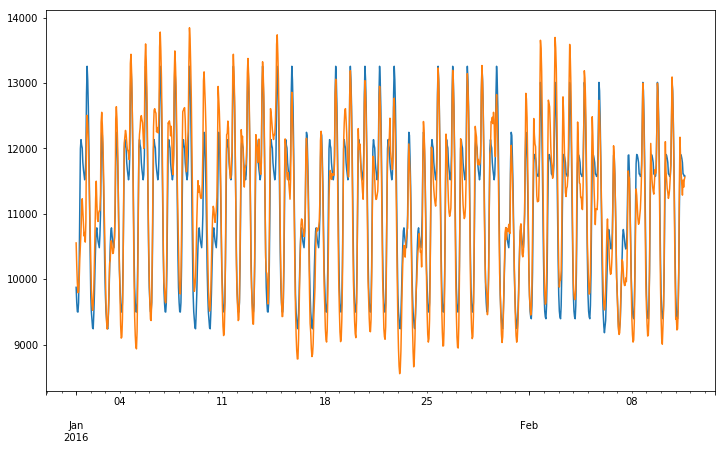

In [12]:
win_s = 0
win_e = 1000
plt.figure(figsize=(12,7))
model_objs.loc['100.0% data',
               'HourOfDay and MonthOfYear and Weekend bas.'].predict(indep_test.index[win_s:win_e]).plot()
indep_test[win_s:win_e].plot()

In [39]:
# models_modelnames = [
#     (npts.Baseline(), 'constant', 1.),
#     (npts.Baseline(npts.HourOfDay(lambdas=[1E-6]),
#                    npts.MonthOfYear(lambdas=[1E-6])), 'hour and month-of-year avg.', 1.),
#     (npts.Baseline(npts.HourOfDay(lambdas=np.logspace(-6,2, 20)),
#                    npts.MonthOfYear(lambdas=np.logspace(-6,2, 20))), 'hour and month-of-year bas.', .75),
#         (npts.Baseline(npts.HourOfDay(lambdas=[1E-6]),
#                    npts.DayOfWeek(lambdas=[1E-6])), 'hour and day-of-week avg.', 1.),
#         (npts.Baseline(npts.HourOfDay(lambdas=np.logspace(-6,2, 20)),
#                    npts.DayOfWeek(lambdas=np.logspace(-6,2, 20))), 'hour and day-of-week bas.', .75),
#         (npts.Baseline(npts.MonthOfYear(lambdas=[1E-6]),
#                    npts.DayOfWeek(lambdas=[1E-6])), 'month-of-year and day-of-week avg.', 1.),
#         (npts.Baseline(npts.MonthOfYear(lambdas=np.logspace(-6,2, 20)),
#                    npts.DayOfWeek(lambdas=np.logspace(-6,2, 20))), 'month-of-year and day-of-week bas.', .75),
#         (npts.Baseline(npts.HourOfDay(lambdas=[1E-6]),
#                        npts.MonthOfYear(lambdas=[1E-6]),
#                    npts.DayOfWeek(lambdas=[1E-6])), 
#                        'hour and month-of-year and day-of-week avg.', 1.),
#             (npts.Baseline(npts.HourOfDay(lambdas=np.logspace(-6,2, 20)),
#                        npts.MonthOfYear(lambdas=np.logspace(-6,2, 20)),
#                    npts.DayOfWeek(lambdas=np.logspace(-6,2, 20))), 
#                        'hour and month-of-year and day-of-week bas.', .75),
#  ]
# features = [npts.HourOfDay, npts.MonthOfYear, npts.DayOfWeek]
# models_modelnames = [
#     (npts.Baseline(), 'constant', 1.),
#     (npts.Baseline(npts.HourOfDay(lambdas=[1E-6]),
#                    npts.MonthOfYear(lambdas=[1E-6])), 'hour and month-of-year avg.', 1.),
#     (npts.Baseline(npts.HourOfDay(lambdas=np.logspace(-6,2, 20)),
#                    npts.MonthOfYear(lambdas=np.logspace(-6,2, 20))), 'hour and month-of-year bas.', .75),
#         (npts.Baseline(npts.HourOfDay(lambdas=[1E-6]),
#                    npts.DayOfWeek(lambdas=[1E-6])), 'hour and weekend avg.', 1.),
#         (npts.Baseline(npts.HourOfDay(lambdas=np.logspace(-6,2, 20)),
#                    npts.DayOfWeek(lambdas=np.logspace(-6,2, 20))), 'hour and weekend bas.', .75),
#         (npts.Baseline(npts.MonthOfYear(lambdas=[1E-6]),
#                    npts.DayOfWeek(lambdas=[1E-6])), 'month-of-year and weekend avg.', 1.),
#         (npts.Baseline(npts.MonthOfYear(lambdas=np.logspace(-6,2, 20)),
#                    npts.DayOfWeek(lambdas=np.logspace(-6,2, 20))), 'month-of-year and weekend bas.', .75),
#         (npts.Baseline(npts.HourOfDay(lambdas=[1E-6]),
#                        npts.MonthOfYear(lambdas=[1E-6]),
#                    npts.DayOfWeek(lambdas=[1E-6])), 
#                        'hour and month-of-year and day-of-week avg.', 1.),
#             (npts.Baseline(npts.HourOfDay(lambdas=np.logspace(-6,2, 20)),
#                        npts.MonthOfYear(lambdas=np.logspace(-6,2, 20)),
#                    npts.DayOfWeek(lambdas=np.logspace(-6,2, 20))), 
#                        'hour and month-of-year and day-of-week bas.', .75),
#  ]



np.random.seed(0)

import time 

def sparsify_data(data, frac):
    return data[np.random.uniform(size=len(data)) < frac]

for data, dataname in [(sparsify_data(data_used, frac), f'{100*frac:.1f}% data') 
                       for frac in [1,.1, .01]]:
    print(len(data),dataname)
    for model, modelname, train_frac in models_modelnames:
        print(f'fitting {modelname} using {100*train_frac:.0f}% train data')
        model_objs.loc[dataname, modelname] = model
        s = time.time()
        model.fit(data,train_frac=train_frac)
        time_taken.loc[dataname, modelname] = time.time() - s
        pred = model.predict(indep_test.index)
        indep_test_rmse.loc[dataname, modelname] = np.sqrt(np.mean((indep_test - pred)**2)) 

building reg matrices
building reg matrices
building reg matrices
building reg matrices
building reg matrices
building reg matrices
building reg matrices
building reg matrices
building reg matrices
17520 100.0% data
fitting constant using 100% train data
fitting hour and month-of-year avg. using 100% train data
fitting hour and month-of-year bas. using 75% train data
fitting hour and day-of-week avg. using 100% train data
fitting hour and day-of-week bas. using 75% train data
fitting month-of-year and day-of-week avg. using 100% train data
fitting month-of-year and day-of-week bas. using 75% train data
fitting hour and month-of-year and day-of-week avg. using 100% train data
fitting hour and month-of-year and day-of-week bas. using 75% train data
1785 10.0% data
fitting constant using 100% train data
fitting hour and month-of-year avg. using 100% train data
fitting hour and month-of-year bas. using 75% train data
fitting hour and day-of-week avg. using 100% train data
fitting hour and 

In [40]:
indep_test_rmse


,constant,hour and month-of-year avg.,hour and day-of-week avg.,month-of-year and day-of-week avg.,hour and month-of-year and day-of-week avg.,hour and month-of-year and day-of-week bas.,hour and day-of-year avg.,day-of-year and day-of-week avg.,hour and day-of-year and day-of-week avg.,hour and day-of-year and day-of-week bas.,hour and week-of-year avg.,week-of-year and day-of-week avg.,hour and week-of-year and day-of-week avg.,hour and week-of-year and day-of-week bas.,hour and month-of-year bas.,hour and day-of-week bas.,month-of-year and day-of-week bas.
100.0% data,1911.805634,858.804315,1383.478807,1518.185898,733.536833,736.003847,1009.387682,1543.116369,811.114655,1103.387273,981.605897,1587.865355,911.415367,880.717451,859.488479,1385.725171,1517.677438
10.0% data,1911.344526,922.120871,1445.799083,1555.188747,855.877981,796.483935,958.283901,1638.524330,992.242680,788.252279,1122.299649,1757.777662,877.717380,835.511281,877.930400,1398.128002,1536.537627
1.0% data,1915.104195,994.126309,1732.515337,1825.760085,1095.374759,939.544919,1575.963296,1822.129704,1569.609010,937.533826,1072.507179,1828.918091,1161.015222,954.236204,942.747268,1501.858855,1661.828581


In [50]:
indep_test_rmse

,constant,hour and month-of-year avg.,hour and day-of-week avg.,month-of-year and day-of-week avg.,hour and month-of-year and day-of-week avg.,hour and month-of-year and day-of-week bas.,hour and day-of-year avg.,day-of-year and day-of-week avg.,hour and day-of-year and day-of-week avg.,hour and day-of-year and day-of-week bas.,hour and week-of-year avg.,week-of-year and day-of-week avg.,hour and week-of-year and day-of-week avg.,hour and week-of-year and day-of-week bas.,hour and month-of-year bas.,hour and day-of-week bas.,month-of-year and day-of-week bas.
100.0% data,1911.805634,858.804315,1383.478807,1518.185898,733.536833,736.003847,1009.387682,1543.116369,811.114655,1103.387273,981.605897,1587.865355,911.415367,880.717451,859.488479,1385.725171,1517.677438
10.0% data,1911.344526,922.120871,1445.799083,1555.188747,855.877981,796.483935,958.283901,1638.524330,992.242680,788.252279,1122.299649,1757.777662,877.717380,835.511281,877.930400,1398.128002,1536.537627
1.0% data,1915.104195,994.126309,1732.515337,1825.760085,1095.374759,939.544919,1575.963296,1822.129704,1569.609010,937.533826,1072.507179,1828.918091,1161.015222,954.236204,942.747268,1501.858855,1661.828581


In [34]:
model_objs.iloc[-1,-1].best_lambda

(0.00012742749857031334, 1.8329807108324375e-05, 0.0023357214690901212)

In [30]:
indep_test_rmse  ## this was with 10x10x10 lambdas

,constant,hour and month-of-year avg.,hour and day-of-week avg.,month-of-year and day-of-week avg.,hour and month-of-year and day-of-week avg.,hour and month-of-year and day-of-week bas.
100.0% data,1911.805634,858.804315,1383.478807,1518.185898,733.536833,741.268305
10.0% data,1911.344526,922.120871,1445.799083,1555.188747,855.877981,805.076818
1.0% data,1915.104195,994.126309,1732.515337,1825.760085,1095.374759,942.635821


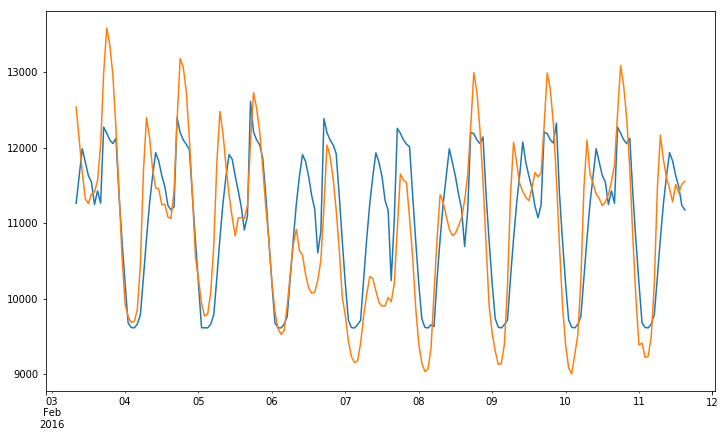

In [66]:
win_s = 800
win_e = 1000
plt.figure(figsize=(12,7))
model_objs.loc['100.0% data',
               'hour and month-of-year and day-of-week bas.'].predict(indep_test.index[win_s:win_e]).plot()
indep_test[win_s:win_e].plot()

In [5]:
# train = PGE_loads[(PGE_loads.index<"2015-01-01")]
# validation = PGE_loads[(PGE_loads.index>="2015-01-01")&(PGE_loads.index<"2016-01-01")]
# test = PGE_loads[(PGE_loads.index>="2016-01-01")&(PGE_loads.index<"2017-01-01")]
# test = test[~((test.index.month==2)&(test.index.day==29))]

# fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=FIGBIG)
# cax = ax1.imshow(train.values.reshape(365,24).T, origin='lower',aspect='auto')
# _ = ax1.set_title('2014')
# _ = ax2.imshow(validation.values.reshape(365,24).T, origin='lower',aspect='auto')
# _ = ax2.set_title('2015')
# _ = ax3.imshow(test.values.reshape(365,24).T, origin='lower',aspect='auto')
# _ = ax3.set_title('2016')
# _ = ax3.set_xlabel('Day')
# _ = ax1.set_ylabel('Hour')
# _ = ax2.set_ylabel('Hour')
# _ = ax3.set_ylabel('Hour')
# axc = fig.colorbar(cax, ax=[ax1, ax2, ax3], shrink=.6)
# axc.ax.set_ylabel('MW')
# plt.savefig(GRAPHDIR+'norcal_loads_2d.pdf')

In [6]:
# indexers = lambda index: index.hour, \
#         lambda index: index.dayofyear-1,\

# n_periods =  24, 366
# lambdas = [[.01, .02, .05, .1, .2, .5, 1., 2., 5., 10., 20.],
#           [10., 20., 50.]]

# b, val_rmse, indexer = smooth_cyclic_baseline(pd.concat([train,validation]), 
#                                      indexers, n_periods,
#                                      lambdas, train_fraction = .75)

In [21]:
# val_rmse_df = pd.DataFrame()
# val_rmse_df.columns.name = '$\lambda_{diu}$'
# val_rmse_df.index.name = '$\lambda_{smooth}$'
# for lambdas_used in val_rmse:
#     val_rmse_df.loc[lambdas_used] = val_rmse[lambdas_used]
# #val_rmse_df

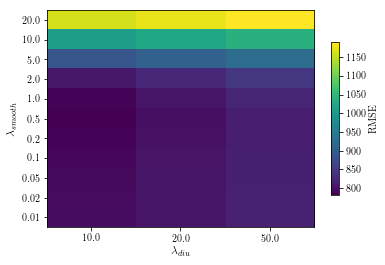

In [22]:
# fig = plt.figure(figsize=FIGREGULAR)
# cax = plt.imshow(val_rmse_df, origin='lower', aspect='auto')
# cax.axes.set_xlabel('$\lambda_{diu}$', size='large')
# cax.axes.set_ylabel('$\lambda_{smooth}$', size='large')
# plt.yticks(np.arange(len(lambdas[0])), lambdas[0])
# plt.xticks(np.arange(len(lambdas[1])), lambdas[1])
# # colorbar
# axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
# axc.ax.set_ylabel('RMSE')

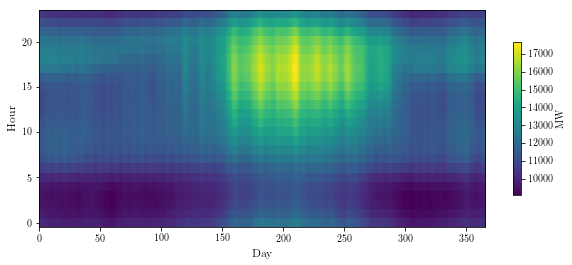

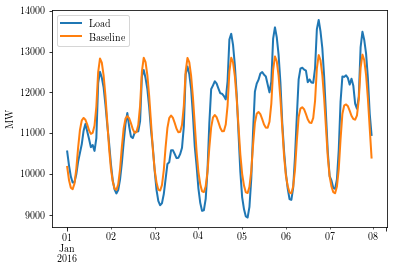

In [23]:
fig = plt.figure(figsize=FIGWIDE)
cax = plt.imshow(b.reshape(366, 24).T, origin='lower', aspect='auto')
#plt.title('$b$')
axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
cax.axes.set_xlabel('Day', size='large')
cax.axes.set_ylabel('Hour', size='large')
axc.ax.set_ylabel('MW')
plt.savefig(GRAPHDIR+'norcal_baseline.pdf')


plot_index = test.iloc[:24*7].index
fig=plt.figure(figsize=FIGREGULAR)
test[plot_index].plot(label='Load')
pd.Series(data=b[indexer(plot_index)],
         index = plot_index).plot(label='Baseline')
fig.gca().set_ylabel('MW')
plt.legend()
plt.savefig(GRAPHDIR+'norcal_loads.pdf')

### Diagnostic 

(0, 768)

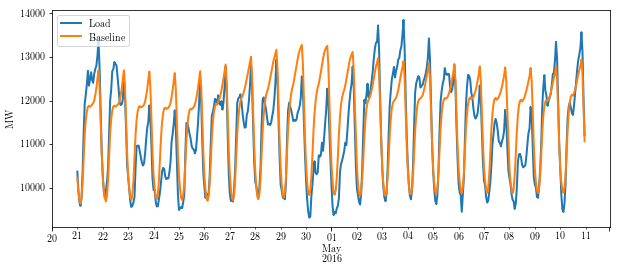

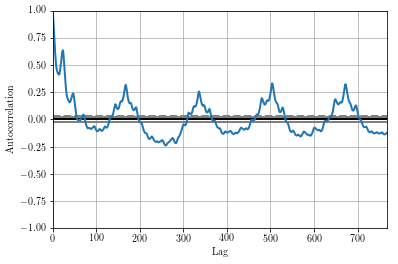

In [14]:
plot_index = test.iloc[24*110:24*130].index
fig=plt.figure(figsize=FIGWIDE)
test[plot_index].plot(label='Load')
pd.Series(data=b[indexer(plot_index)],
         index = plot_index).plot(label='Baseline')
fig.gca().set_ylabel('MW')
plt.legend()
#plt.savefig(GRAPHDIR+'norcal_loads_week.pdf')

test_residuals = test - b[indexer(test.index)]
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(test_residuals)
plt.xlim([0,24*32])

## Month/week fit 

In [24]:
indexers = lambda index: index.hour, \
    lambda index: index.month-1,\
    lambda index: index.dayofweek,

n_periods =  24, 12, 7
#lambdas = [[.01, .02, .05, .1, .2, .5, 1., 2., 5., 10., 20.]]*3
lambdas = [[.01, .02, .05, .1, .2, .5, 1.,2.]]*3


b, val_rmse, indexer = smooth_cyclic_baseline(pd.concat([train,validation]), 
                                     indexers, n_periods,
                                     lambdas, train_fraction = .75)

We have 17520 observations.
Fitting baseline with 2016 = 24*12*7 values.
Building block diag. with 84 blocks.
Building matrix of size 24 with diff 1.
Building block diag. with 7 blocks.
Building matrix of size 288 with diff 24.
Building block diag. with 1 blocks.
Building matrix of size 2016 with diff 288.
Solving for 512 combinations of lambdas.
Best lambdas are (0.5, 0.05, 0.02), with validation RMSE 697.75.
Fitting with all data.


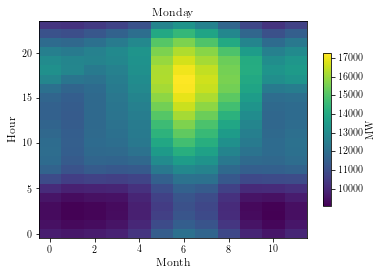

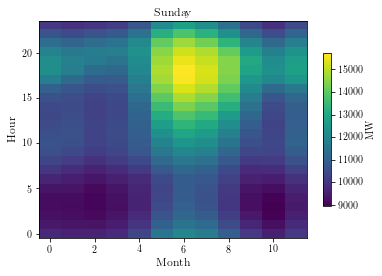

In [16]:
fig = plt.figure(figsize=FIGREGULAR)
cax = plt.imshow(b[:288].reshape(12, 24).T, origin='lower', aspect='auto')
plt.title('Monday', size='large')
axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
cax.axes.set_xlabel('Month', size='large')
cax.axes.set_ylabel('Hour', size='large')
axc.ax.set_ylabel('MW')

fig = plt.figure(figsize=FIGREGULAR)
plt.title('Sunday', size='large')
cax = plt.imshow(b[-288:].reshape(12, 24).T, origin='lower', aspect='auto')
#plt.title('$b$')
axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
cax.axes.set_xlabel('Month', size='large')
cax.axes.set_ylabel('Hour', size='large')
axc.ax.set_ylabel('MW')
#plt.savefig(GRAPHDIR+'norcal_baseline.pdf')

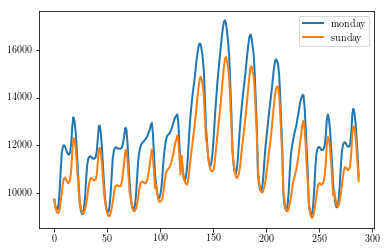

In [18]:
plt.plot(b[:288],label='monday')
#plt.plot(b[-288*3:-288*2])
#plt.plot(b[-288*2:-288])
plt.plot(b[-288:],label='sunday')
plt.legend()

### Diagnostic

(0, 768)

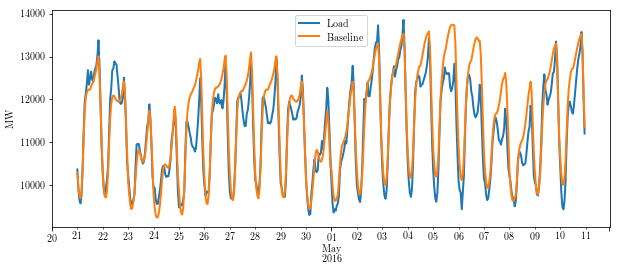

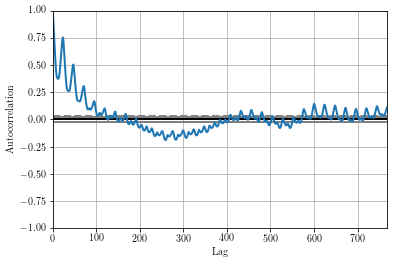

In [25]:
plot_index = test.iloc[24*110:24*130].index
fig=plt.figure(figsize=FIGWIDE)
test[plot_index].plot(label='Load')
pd.Series(data=b[indexer(plot_index)],
         index = plot_index).plot(label='Baseline')
fig.gca().set_ylabel('MW')
plt.legend()
#plt.savefig(GRAPHDIR+'norcal_loads_week.pdf')

test_residuals = test - b[indexer(test.index)]
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(test_residuals)
plt.xlim([0,24*32])

## Old 

In [ ]:
# residuals = []

# K = 10
# steps = np.zeros((N,K))
# xs = np.zeros((N,K))

# Q = np.ones((K+1, K+1))
# p = np.concatenate([np.zeros(K),[1.]])
# Q[-1,-1] = 0.

# # Anderson acceleration
# def Anderson(steps, xs, i, K):
#     if i <= K:
#         return x
#     Q[:K,:K] = 2 * steps.T@steps
#     return xs @ np.linalg.solve(Q, p)[:-1]

# import time
# start = time.time()
# for i in range(5000):
#     x = Anderson(steps, xs, i, K)
#     step = AAT @ x - Ab
#     x -= lambda_step * step
#     steps[:,i%K] = step
#     xs[:,i%K] = x
#     residuals.append(np.sqrt(np.mean(step**2)))
#     if residuals[-1] < 1E-5:
#         break
# print (time.time() - start)

# plt.semilogy(residuals)

Anderson with K=25 takes about 40s, 2500 iters, to get to 1E-5 residual avg.

Anderson with K=10 takes about 25s, 3300 iters, to get to 1E-5 residual avg.

Anderson with K=7 takes about 22s, 4000 iters, to get to 1E-5 residual avg.

Anderson with K=5 takes about 14s, 3500 iters, to get to 1E-5 residual avg.

In [ ]:
# import cvxpy as cvx

# days, times = windpow_2011.shape
# baseline = cvx.Variable(days, times)

# objective = cvx.sum_squares(baseline - windpow_2011.as_matrix()) #+ \
#    # cvx.sum_squares(baseline - windpow_2012.as_matrix())

# lambda_time = 30.
# objective += lambda_time * cvx.sum_squares(baseline[:,:-1] - baseline[:,1:])
# objective += lambda_time * cvx.sum_squares(baseline[:,-1] - baseline[:,0])

# lambda_date = 100.
# objective += lambda_date * cvx.sum_squares(baseline[:-1,:] - baseline[1:,:])
# objective += lambda_date * cvx.sum_squares(baseline[-1,:] - baseline[0,:])


# problem = cvx.Problem(cvx.Minimize(objective), [])
# #problem.solve(solver=cvx.LS, verbose=True)
# problem.solve(solver=cvx.SCS, verbose=True, use_indirect=True, 
#               acceleration_lookback = 25, max_iters = 2000)